In [126]:
import pandas as pd
import numpy as np
from io import StringIO
import plotly.graph_objects as go
from IPython.display import display, Markdown

In [127]:
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")
df

,Order ID,Customer ID,Platform,Order Date & Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested
0,ORD000001,CUST2824,JioMart,19:29.5,30,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No
1,ORD000002,CUST1409,Blinkit,54:29.5,16,Dairy,279,Quick and reliable!,5,No,No
2,ORD000003,CUST5506,JioMart,21:29.5,25,Beverages,599,Items missing from order.,2,No,Yes
3,ORD000004,CUST5012,JioMart,19:29.5,42,Beverages,946,Items missing from order.,2,Yes,Yes
4,ORD000005,CUST4657,Blinkit,49:29.5,30,Beverages,334,"Fast delivery, great service!",5,No,No
...,...,...,...,...,...,...,...,...,...,...,...
99995,ORD099996,CUST5324,JioMart,49:29.5,24,Dairy,289,Packaging could be better.,3,No,No
99996,ORD099997,CUST1677,JioMart,18:29.5,19,Snacks,322,Good quality products.,4,No,No
99997,ORD099998,CUST8198,JioMart,27:29.5,41,Dairy,135,"Fast delivery, great service!",5,Yes,No
99998,ORD099999,CUST9975,JioMart,14:29.5,31,Grocery,973,Quick and reliable!,5,No,No


In [121]:



# Data cleaning and preparation
df['Delivery_Delay_Binary'] = df['Delivery Delay'].map({'Yes': 1, 'No': 0})
df['Refund_Requested_Binary'] = df['Refund Requested'].map({'Yes': 1, 'No': 0})

# Section Heading
display(Markdown("##  Key Performance Metrics Analysis"))

# 1. PLATFORM PERFORMANCE ANALYSIS
display(Markdown("### 1. Platform Performance Analysis"))

platform_analysis = df.groupby('Platform').agg({
    'Order Value (INR)': ['count', 'mean', 'sum'],
    'Service Rating': 'mean',
    'Delivery Time (Minutes)': 'mean',
    'Delivery_Delay_Binary': 'sum',
    'Refund_Requested_Binary': 'sum'
}).round(2)

platform_analysis.columns = ['Total_Orders', 'Avg_Order_Value', 'Total_Revenue', 'Avg_Rating', 'Avg_Delivery_Time', 'Delayed_Orders', 'Refund_Requests']
display(platform_analysis)

# 2. PRODUCT CATEGORY ANALYSIS
display(Markdown("### 2. Product Category Analysis"))

category_analysis = df.groupby('Product Category').agg({
    'Order Value (INR)': ['count', 'mean', 'sum'],
    'Service Rating': 'mean',
    'Delivery Time (Minutes)': 'mean',
    'Delivery_Delay_Binary': 'sum',
    'Refund_Requested_Binary': 'sum'
}).round(2)

category_analysis.columns = ['Total_Orders', 'Avg_Order_Value', 'Total_Revenue', 'Avg_Rating', 'Avg_Delivery_Time', 'Delayed_Orders', 'Refund_Requests']
display(category_analysis)

# 3. DELIVERY PERFORMANCE ANALYSIS
display(Markdown("### 3. Delivery Performance Analysis"))

delivery_performance = pd.DataFrame({
    'Metric': ['Average Delivery Time (min)', 'Delivery Delay Rate (%)', 'Refund Request Rate (%)'],
    'Value': [
        round(df['Delivery Time (Minutes)'].mean(), 1),
        round(df['Delivery_Delay_Binary'].sum() / len(df) * 100, 1),
        round(df['Refund_Requested_Binary'].sum() / len(df) * 100, 1)
    ]
})
display(delivery_performance)

# 4. CUSTOMER SATISFACTION ANALYSIS
display(Markdown("### 4. Customer Satisfaction Analysis"))

total_orders = len(df)
high_rated_orders = (df['Service Rating'] >= 4).sum()
avg_rating = round(df['Service Rating'].mean(), 1)
high_rating_pct = round(high_rated_orders / total_orders * 100, 1)

customer_satisfaction = pd.DataFrame({
    'Metric': ['Average Service Rating', 'Orders with Rating ≥ 4', 'High Rating Percentage (%)'],
    'Value': [avg_rating, f"{high_rated_orders}/{total_orders}", high_rating_pct]
})
display(customer_satisfaction)

# 5. CORRELATION ANALYSIS
display(Markdown("### 5. Correlation Analysis"))

correlation_data = df[['Order Value (INR)', 'Service Rating', 'Delivery Time (Minutes)', 'Delivery_Delay_Binary', 'Refund_Requested_Binary']]
correlations = correlation_data.corr().round(3)
display(correlations)


##  Key Performance Metrics Analysis

### 1. Platform Performance Analysis

,Total_Orders,Avg_Order_Value,Total_Revenue,Avg_Rating,Avg_Delivery_Time,Delayed_Orders,Refund_Requests
Platform,,,,,,,
Blinkit,33424,589.55,19705084,3.23,29.47,4473,15353
JioMart,33127,590.53,19562372,3.25,29.63,4580,15178
Swiggy Instamart,33449,592.90,19831984,3.24,29.50,4619,15288


### 2. Product Category Analysis

,Total_Orders,Avg_Order_Value,Total_Revenue,Avg_Rating,Avg_Delivery_Time,Delayed_Orders,Refund_Requests
Product Category,,,,,,,
Beverages,16536,549.51,9086669,3.25,29.50,2236,7549
Dairy,16857,451.48,7610522,3.24,29.56,2312,7691
Fruits & Vegetables,16632,375.57,6246517,3.23,29.55,2290,7692
Grocery,16737,848.06,14194055,3.22,29.58,2313,7811
Personal Care,16533,1052.17,17395601,3.25,29.57,2254,7517
Snacks,16705,273.34,4566076,3.25,29.45,2267,7559


### 3. Delivery Performance Analysis

,Metric,Value
0,Average Delivery Time (min),29.5
1,Delivery Delay Rate (%),13.7
2,Refund Request Rate (%),45.8


### 4. Customer Satisfaction Analysis

,Metric,Value
0,Average Service Rating,3.2
1,Orders with Rating ≥ 4,46477/100000
2,High Rating Percentage (%),46.5


### 5. Correlation Analysis

,Order Value (INR),Service Rating,Delivery Time (Minutes),Delivery_Delay_Binary,Refund_Requested_Binary
Order Value (INR),1.000,-0.003,0.007,0.003,0.003
Service Rating,-0.003,1.000,0.000,-0.003,-0.918
Delivery Time (Minutes),0.007,0.000,1.000,0.640,0.001
Delivery_Delay_Binary,0.003,-0.003,0.640,1.000,0.002
Refund_Requested_Binary,0.003,-0.918,0.001,0.002,1.000


In [122]:
# Add Markdown heading
display(Markdown("##  Data Preparation and Visualization Summary"))

# PLATFORM COMPARISON METRICS
display(Markdown("###  Platform Metrics Overview"))

platform_metrics = df.groupby('Platform').agg({
    'Order Value (INR)': ['count', 'mean'],
    'Service Rating': 'mean',
    'Delivery Time (Minutes)': 'mean',
    'Delivery_Delay_Binary': lambda x: (x.sum() / len(x)) * 100,
    'Refund_Requested_Binary': lambda x: (x.sum() / len(x)) * 100
}).round(2)

platform_metrics.columns = [
    'Order_Count',
    'Avg_Order_Value',
    'Avg_Rating',
    'Avg_Delivery_Time',
    'Delay_Rate_Percent',
    'Refund_Rate_Percent'
]

display(platform_metrics)

# CATEGORY PERFORMANCE METRICS
display(Markdown("###  Category Metrics Overview"))

category_metrics = df.groupby('Product Category').agg({
    'Order Value (INR)': ['count', 'mean'],
    'Service Rating': 'mean',
    'Delivery Time (Minutes)': 'mean'
}).round(2)

category_metrics.columns = [
    'Order_Count',
    'Avg_Order_Value',
    'Avg_Rating',
    'Avg_Delivery_Time'
]

display(category_metrics)

# PERFORMANCE ISSUES SUMMARY
display(Markdown("###  Performance Issues Summary"))

performance_issues = pd.DataFrame({
    'Metric': [
        'Total Orders',
        'Orders with Delays',
        'Orders with Refunds',
        'Low Rated Orders (<= 3)',
        'High Value Orders (> ₹500)'
    ],
    'Value': [
        len(df),
        int(df['Delivery_Delay_Binary'].sum()),
        int(df['Refund_Requested_Binary'].sum()),
        int((df['Service Rating'] <= 3).sum()),
        int((df['Order Value (INR)'] > 500).sum())
    ]
})

display(performance_issues)

##  Data Preparation and Visualization Summary

###  Platform Metrics Overview

,Order_Count,Avg_Order_Value,Avg_Rating,Avg_Delivery_Time,Delay_Rate_Percent,Refund_Rate_Percent
Platform,,,,,,
Blinkit,33424,589.55,3.23,29.47,13.38,45.93
JioMart,33127,590.53,3.25,29.63,13.83,45.82
Swiggy Instamart,33449,592.90,3.24,29.50,13.81,45.71


###  Category Metrics Overview

,Order_Count,Avg_Order_Value,Avg_Rating,Avg_Delivery_Time
Product Category,,,,
Beverages,16536,549.51,3.25,29.50
Dairy,16857,451.48,3.24,29.56
Fruits & Vegetables,16632,375.57,3.23,29.55
Grocery,16737,848.06,3.22,29.58
Personal Care,16533,1052.17,3.25,29.57
Snacks,16705,273.34,3.25,29.45


###  Performance Issues Summary

,Metric,Value
0,Total Orders,100000
1,Orders with Delays,13672
2,Orders with Refunds,45819
3,Low Rated Orders (<= 3),53523
4,High Value Orders (> ₹500),47498


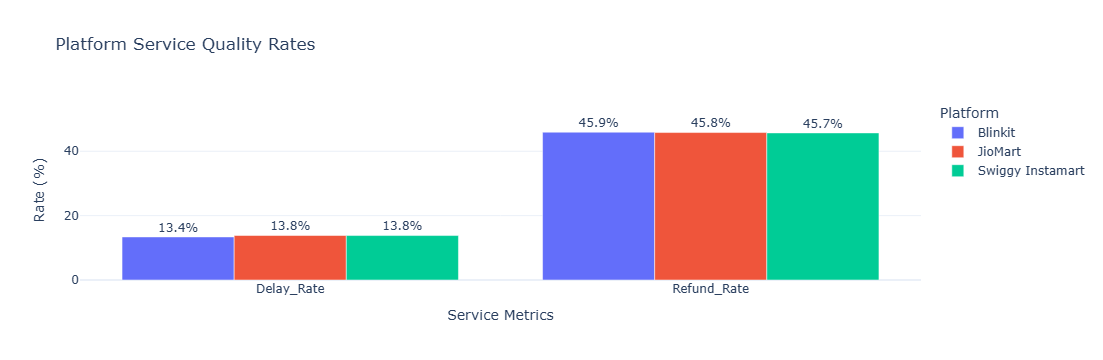

In [124]:
import pandas as pd
import plotly.express as px

# Load the data
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

# Normalize 'Yes'/'No' in 'Delivery Delay' and 'Refund Requested' columns
df["Delivery Delay"] = df["Delivery Delay"].str.strip().str.lower()
df["Refund Requested"] = df["Refund Requested"].str.strip().str.lower()

# Group by platform and calculate delay and refund rates (percentages)
performance_metrics = df.groupby("Platform").agg(
    Delay_Rate=("Delivery Delay", lambda x: (x == "yes").mean() * 100),
    Refund_Rate=("Refund Requested", lambda x: (x == "yes").mean() * 100)
).reset_index()

# Melt dataframe for easier plotting with Plotly Express
perf_melted = performance_metrics.melt(id_vars='Platform', 
                                      var_name='Service Metric', 
                                      value_name='Rate (%)')

# Plot with data labels
fig = px.bar(
    perf_melted,
    x='Service Metric',
    y='Rate (%)',
    color='Platform',
    barmode='group',
    title='Platform Service Quality Rates',
    labels={'Rate (%)': 'Rate (%)', 'Service Metric': 'Service Metrics'}
)

# Add data labels on bars
fig.update_traces(texttemplate='%{y:.1f}%', textposition='outside')

fig.update_layout(
    yaxis=dict(range=[0, perf_melted['Rate (%)'].max() + 10]),
    template='plotly_white',
    uniformtext_minsize=8,
    uniformtext_mode='hide'
)

fig.show()


           Platform  Avg Order Value  Avg Rating  Avg Delivery Time
0           Blinkit       589.548947    3.233844          29.474898
1           JioMart       590.526519    3.245147          29.634498
2  Swiggy Instamart       592.902150    3.243415          29.499925


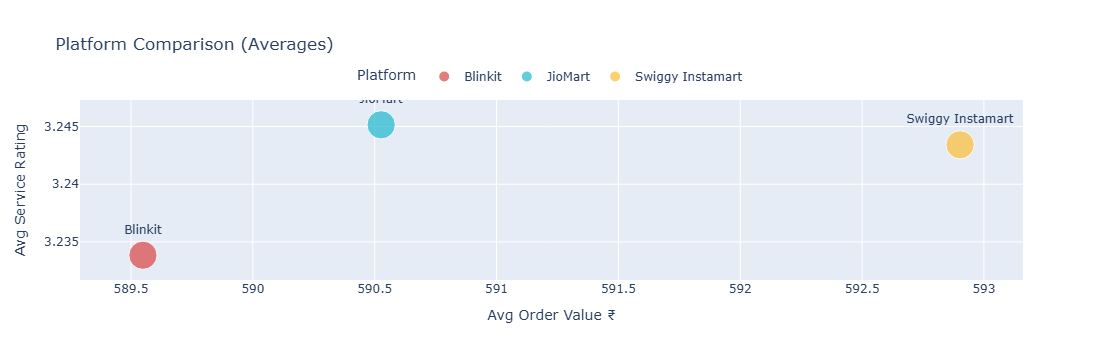

In [125]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

# Group by Platform and calculate averages
avg_df = df.groupby("Platform").agg({
    "Order Value (INR)": "mean",
    "Service Rating": "mean",
    "Delivery Time (Minutes)": "mean"
}).reset_index()

# Rename columns for clarity
avg_df.columns = ["Platform", "Avg Order Value", "Avg Rating", "Avg Delivery Time"]
print(avg_df)

fig = px.scatter(
    avg_df,
    x="Avg Order Value",
    y="Avg Rating",
    size="Avg Delivery Time",
    color="Platform",
    color_discrete_map={
        "JioMart": "#1FB8CD",
        "Blinkit": "#DB4545",
        "Swiggy Instamart": "#FDBE34"
    },
    text="Platform",
    title="Platform Comparison (Averages)"
)

fig.update_traces(textposition="top center")

fig.update_layout(
    xaxis_title="Avg Order Value ₹",
    yaxis_title="Avg Service Rating",
    legend=dict(
        orientation="h", 
        yanchor="bottom", 
        y=1.05, 
        xanchor="center", 
        x=0.5
    )
)

fig.show()


      Product Category  Average Order Value (INR)
4        Personal Care                1052.174499
3              Grocery                 848.064468
0            Beverages                 549.508285
1                Dairy                 451.475470
2  Fruits & Vegetables                 375.572210
5               Snacks                 273.335887


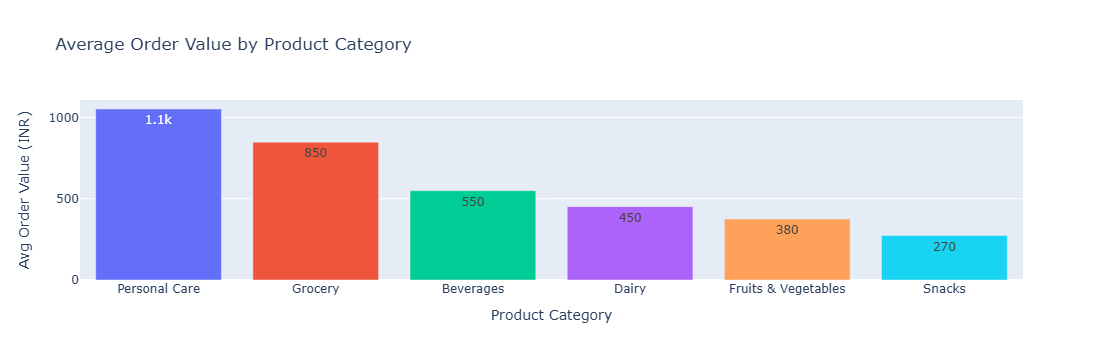

In [109]:
# Group by Product Category and calculate average order value
avg_order_value = df.groupby("Product Category")["Order Value (INR)"].mean().reset_index()

# Sort for better visualization (optional)
avg_order_value = avg_order_value.sort_values(by="Order Value (INR)", ascending=False)

# Rename columns (optional)
avg_order_value.columns = ["Product Category", "Average Order Value (INR)"]

# Show table
print(avg_order_value)

# Plot the bar chart
fig = px.bar(
    avg_order_value,
    x="Product Category",
    y="Average Order Value (INR)",
    color="Product Category",
    title="Average Order Value by Product Category",
    text_auto=".2s"
)

fig.update_layout(
    xaxis_title="Product Category",
    yaxis_title="Avg Order Value (INR)",
    showlegend=False
)

fig.show()


           Platform  Avg Delivery Time (min)  Avg Service Rating  \
0           Blinkit                29.474898            3.233844   
1           JioMart                29.634498            3.245147   
2  Swiggy Instamart                29.499925            3.243415   

   Total Delays  Total Refunds  
0          4473          15353  
1          4580          15178  
2          4619          15288  


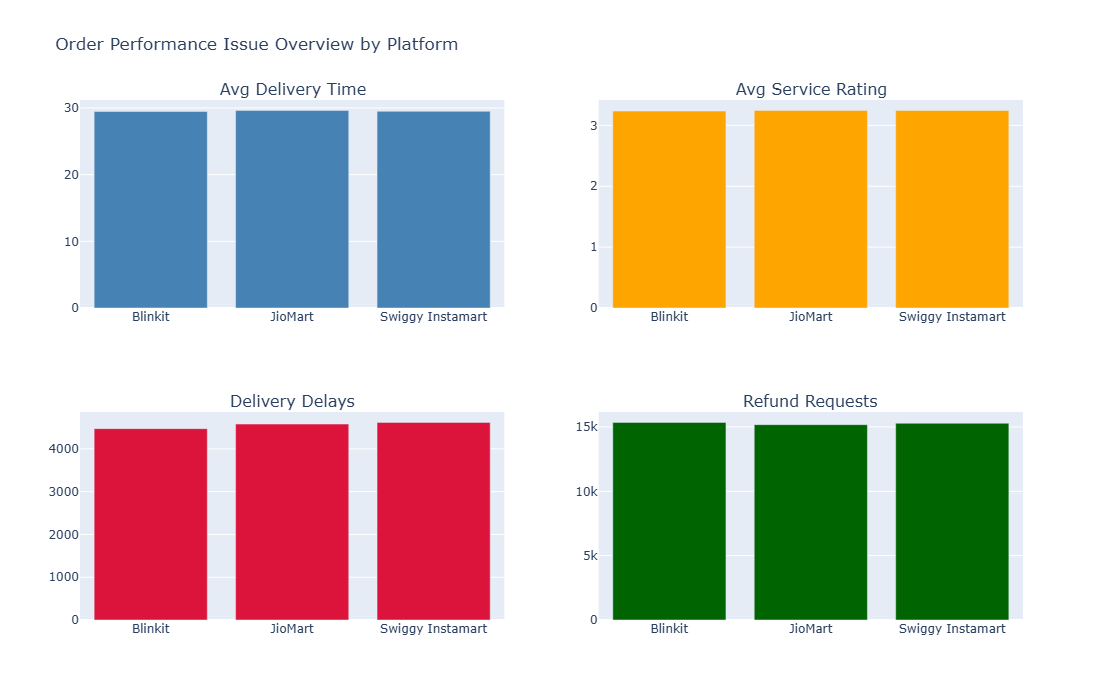

In [112]:
from plotly.subplots import make_subplots
# Normalize Yes/No values
df["Delivery Delay"] = df["Delivery Delay"].str.strip().str.lower()
df["Refund Requested"] = df["Refund Requested"].str.strip().str.lower()

# Create aggregated performance overview
performance_summary = df.groupby("Platform").agg({
    "Delivery Time (Minutes)": "mean",
    "Service Rating": "mean",
    "Delivery Delay": lambda x: (x == "yes").sum(),
    "Refund Requested": lambda x: (x == "yes").sum()
}).reset_index()

# Rename for readability
performance_summary.columns = [
    "Platform",
    "Avg Delivery Time (min)",
    "Avg Service Rating",
    "Total Delays",
    "Total Refunds"
]

# Show summary table
print(performance_summary)

# ---------------------------
# Optional: Visualize metrics
# ---------------------------

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=("Avg Delivery Time", "Avg Service Rating", "Delivery Delays", "Refund Requests"),
    vertical_spacing=0.2
)

# Bar chart for Avg Delivery Time
fig.add_trace(
    go.Bar(x=performance_summary["Platform"], y=performance_summary["Avg Delivery Time (min)"],
           marker_color='steelblue', name="Avg Delivery Time"),
    row=1, col=1
)

# Bar chart for Avg Service Rating
fig.add_trace(
    go.Bar(x=performance_summary["Platform"], y=performance_summary["Avg Service Rating"],
           marker_color='orange', name="Avg Rating"),
    row=1, col=2
)

# Bar chart for Delivery Delays
fig.add_trace(
    go.Bar(x=performance_summary["Platform"], y=performance_summary["Total Delays"],
           marker_color='crimson', name="Delays"),
    row=2, col=1
)

# Bar chart for Refund Requests
fig.add_trace(
    go.Bar(x=performance_summary["Platform"], y=performance_summary["Total Refunds"],
           marker_color='darkgreen', name="Refunds"),
    row=2, col=2
)

fig.update_layout(
    height=700,
    title_text="Order Performance Issue Overview by Platform",
    showlegend=False
)

fig.show()


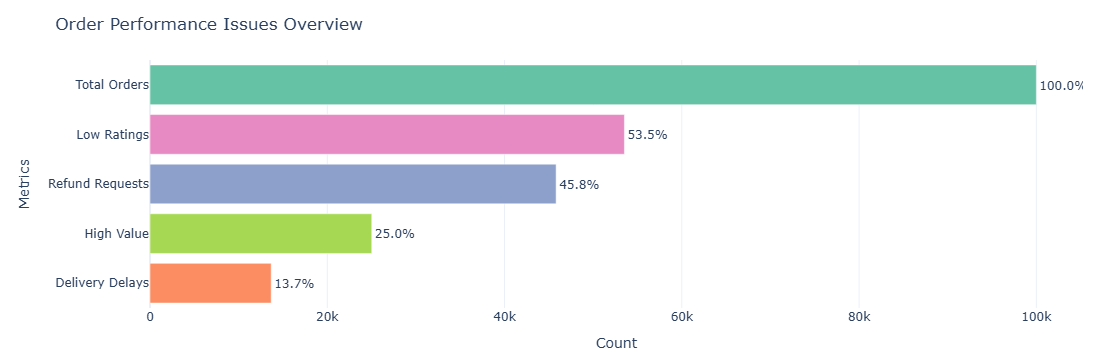

In [114]:
import pandas as pd
import plotly.express as px

# Load data
df = pd.read_csv("Ecommerce_Delivery_Analytics_New.csv")

# Normalize Yes/No columns
df["Delivery Delay"] = df["Delivery Delay"].str.strip().str.lower()
df["Refund Requested"] = df["Refund Requested"].str.strip().str.lower()

# Thresholds
low_rating_threshold = 3
high_value_threshold = df["Order Value (INR)"].quantile(0.75)

# Calculate counts
total_orders = len(df)
delivery_delays = (df["Delivery Delay"] == "yes").sum()
refund_requests = (df["Refund Requested"] == "yes").sum()
low_ratings = (df["Service Rating"] <= low_rating_threshold).sum()
high_value_orders = (df["Order Value (INR)"] >= high_value_threshold).sum()

# Prepare dataframe for plotting
data = {
    "Metric": ["Total Orders", "Delivery Delays", "Refund Requests", "Low Ratings", "High Value"],
    "Count": [total_orders, delivery_delays, refund_requests, low_ratings, high_value_orders],
}
overview_df = pd.DataFrame(data)
overview_df["Percent"] = overview_df["Count"] / total_orders * 100

# Plot with Plotly Express
fig = px.bar(
    overview_df,
    x="Count",
    y="Metric",
    orientation='h',
    text=overview_df["Percent"].apply(lambda x: f"{x:.1f}%"),
    color="Metric",
    color_discrete_sequence=px.colors.qualitative.Set2,
    title="Order Performance Issues Overview"
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Count",
    yaxis_title="Metrics",
    yaxis=dict(categoryorder='total ascending'),
    uniformtext_minsize=12,
    uniformtext_mode='hide',
    template='plotly_white',
    showlegend=False,
    margin=dict(l=150, r=20, t=60, b=40)
)

fig.show()
